In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [118]:
### DATA
from data_loader import df_consumption, joiner_official, merge6

In [119]:
df_master= merge6
df_master.columns

Index(['country_a', 'country_b', 'year', 'a_name', 'b_name', 'imports',
       'exports', 'iso_code_a', 'iso_code_b', 'co2', 'consumption_co2',
       'population', 'gdp', 'co2_b', 'consumption_co2_b', 'population_b',
       'gdp_b', 'imports_a', 'exports_a', 'imports_b', 'exports_b'],
      dtype='object')

In [99]:
df_master

,country_a,country_b,year,a_name,b_name,imports,exports,iso_code_a,iso_code_b,co2,...,population,gdp,co2_b,consumption_co2_b,population_b,gdp_b,imports_a,exports_a,imports_b,exports_b
0,2,20,1997,United States of America,Canada,171440.00,145143.00,USA,CAN,5701.921,...,271713984.0,1.140000e+13,524.433,548.343,29742000.0,9.800000e+11,885651.80,751578.29447,171440.000000,145143.000000
1,2,20,1998,United States of America,Canada,178048.00,149054.00,USA,CAN,5749.893,...,275175008.0,1.190000e+13,533.101,556.605,30022000.0,1.000000e+12,933155.60,744774.72000,178048.000000,149054.000000
2,2,20,1999,United States of America,Canada,198828.00,157847.00,USA,CAN,5829.520,...,278548000.0,1.250000e+13,548.939,556.561,30303000.0,1.080000e+12,1032958.60,762989.54000,198828.000000,157847.000000
3,2,20,2000,United States of America,Canada,229191.00,169068.00,USA,CAN,5997.299,...,281711008.0,1.300000e+13,571.507,580.681,30588000.0,1.150000e+12,1216111.50,840259.75000,229191.000000,169068.000000
4,2,20,2001,United States of America,Canada,220138.00,155205.00,USA,CAN,5899.855,...,284608000.0,1.310000e+13,564.231,563.699,30880000.0,1.150000e+12,1158994.90,774397.92000,220138.000000,155205.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105920,900,920,2009,Australia,New Zealand,5765.09,4717.83,AUS,NZL,408.345,...,21751000.0,9.270000e+11,34.772,36.333,4323000.0,1.270000e+11,5765.09,4717.83000,24803.579716,25388.966812
105921,900,920,2010,Australia,New Zealand,7298.35,5568.84,AUS,NZL,406.426,...,22155000.0,9.940000e+11,34.997,36.963,4370000.0,1.330000e+11,7298.35,5568.84000,30194.026941,30405.535784
105922,900,920,2011,Australia,New Zealand,8619.08,5853.16,AUS,NZL,404.264,...,22538000.0,1.030000e+12,34.314,38.272,4419000.0,1.380000e+11,8619.08,5853.16000,37203.900530,36566.919963
105923,900,920,2012,Australia,New Zealand,8282.99,5837.67,AUS,NZL,406.987,...,22904000.0,1.020000e+12,35.986,39.263,4468000.0,1.380000e+11,8282.99,5837.67000,37077.319342,38090.810749


In [120]:
paris= pd.read_csv('data/paris.csv')
paris= paris.rename(columns={'base year': 'year'})
paris.dropna(inplace=True)
paris['year']= paris['year'].astype(int)                  
df_paris = pd.merge(paris,df_consumption[['iso_code','year','consumption_co2']],'left',left_on=(['iso_code','year']),right_on=(['iso_code','year']))
df_paris= df_paris.rename(columns={'iso_code': 'iso_code_a'})
df_paris['reduction high']= df_paris['reduction high'].str.rstrip('%').astype('float') / 100.0
# Compute emissions goal for the selected countries
df_paris['Emissions_goal']= df_paris['consumption_co2']*(1-df_paris['reduction high'])

df_paris

,Unnamed: 0,country,iso_code_a,year,target year,reduction low,reduction high,priority_group,consumption_co2,Emissions_goal
0,0,China,CHN,2005,2030.0,20%,0.20,1,4822.978,3858.38240
1,1,USA,USA,2005,2025.0,26%,0.28,1,6547.818,4714.42896
2,2,Austria,AUT,1990,2030.0,40%,0.40,2,82.531,49.51860
3,3,Belgium,BEL,1990,2030.0,40%,0.40,2,147.260,88.35600
4,4,Bulgaria,BGR,1990,2030.0,40%,0.40,2,56.052,33.63120
5,5,Croatia,HRV,1990,2030.0,40%,0.40,2,20.543,12.32580
6,6,Republic of Cyprus,CYP,1990,2030.0,40%,0.40,2,5.784,3.47040
7,7,Czech Republic,CZE,1990,2030.0,40%,0.40,2,163.037,97.82220
8,8,Denmark,DNK,1990,2030.0,40%,0.40,2,57.452,34.47120
9,9,Estonia,EST,1990,2030.0,40%,0.40,2,31.784,19.07040


In [121]:
# Join df_master and paris data
df_master = df_master[(df_master.gdp.notnull())]
df_master['gdp']= df_master['gdp']/1000000 # GDP in millon dollars
df = pd.merge(df_master,df_paris[['iso_code_a','Emissions_goal','priority_group']],'left',on=['iso_code_a'])
df = df.loc[df.consumption_co2.notnull()]

In [102]:
df

,country_a,country_b,year,a_name,b_name,imports,exports,iso_code_a,iso_code_b,co2,...,co2_b,consumption_co2_b,population_b,gdp_b,imports_a,exports_a,imports_b,exports_b,Emissions_goal,priority_group
0,2,20,1997,United States of America,Canada,171440.00,145143.00,USA,CAN,5701.921,...,524.433,548.343,29742000.0,9.800000e+11,885651.80,751578.29447,171440.000000,145143.000000,4714.42896,1.0
1,2,20,1998,United States of America,Canada,178048.00,149054.00,USA,CAN,5749.893,...,533.101,556.605,30022000.0,1.000000e+12,933155.60,744774.72000,178048.000000,149054.000000,4714.42896,1.0
2,2,20,1999,United States of America,Canada,198828.00,157847.00,USA,CAN,5829.520,...,548.939,556.561,30303000.0,1.080000e+12,1032958.60,762989.54000,198828.000000,157847.000000,4714.42896,1.0
3,2,20,2000,United States of America,Canada,229191.00,169068.00,USA,CAN,5997.299,...,571.507,580.681,30588000.0,1.150000e+12,1216111.50,840259.75000,229191.000000,169068.000000,4714.42896,1.0
4,2,20,2001,United States of America,Canada,220138.00,155205.00,USA,CAN,5899.855,...,564.231,563.699,30880000.0,1.150000e+12,1158994.90,774397.92000,220138.000000,155205.000000,4714.42896,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105920,900,920,2009,Australia,New Zealand,5765.09,4717.83,AUS,NZL,408.345,...,34.772,36.333,4323000.0,1.270000e+11,5765.09,4717.83000,24803.579716,25388.966812,234.58824,1.0
105921,900,920,2010,Australia,New Zealand,7298.35,5568.84,AUS,NZL,406.426,...,34.997,36.963,4370000.0,1.330000e+11,7298.35,5568.84000,30194.026941,30405.535784,234.58824,1.0
105922,900,920,2011,Australia,New Zealand,8619.08,5853.16,AUS,NZL,404.264,...,34.314,38.272,4419000.0,1.380000e+11,8619.08,5853.16000,37203.900530,36566.919963,234.58824,1.0
105923,900,920,2012,Australia,New Zealand,8282.99,5837.67,AUS,NZL,406.987,...,35.986,39.263,4468000.0,1.380000e+11,8282.99,5837.67000,37077.319342,38090.810749,234.58824,1.0


In [122]:
# COLUMNS NEEDED:
# group - GDP/Cap
df['gdp_percap'] = df.apply(lambda row: row['gdp'] / row['population'], axis=1)
# consumption-based emissions per capita
df.rename(columns = {'consumption_co2':'consumption'}, inplace=True)
df['consumption_percap'] = df['consumption']*1000000000000 / df['population']
df['consumption_goal'] = df['Emissions_goal']*1000000000000 / df['population']

# import_share
df['imports_share'] = df.apply(lambda row: row['imports'] / row['imports_a'], axis=1)

# Marginal propensity of external consumption or total Imports: M/GDP
df['Mg_ImportsTot'] = df['imports_a']/df['gdp']

# Marginal propensity of imports for each trade partner
df['MgM_bilateral'] = df['imports']*100/df['gdp']


In [104]:
df.head(60)

,country_a,country_b,year,a_name,b_name,imports,exports,iso_code_a,iso_code_b,co2,...,imports_b,exports_b,Emissions_goal,priority_group,gdp_percap,consumption_percap,consumption_goal,imports_share,Mg_ImportsTot,MgM_bilateral
0,2,20,1997,United States of America,Canada,171440.0,145143.00,USA,CAN,5701.921,...,171440.000000,145143.00,4714.42896,1.0,0.041956,2.096607e+07,1.735070e+07,0.193575,0.077689,1.503860
1,2,20,1998,United States of America,Canada,178048.0,149054.00,USA,CAN,5749.893,...,178048.000000,149054.00,4714.42896,1.0,0.043245,2.125665e+07,1.713248e+07,0.190802,0.078416,1.496202
2,2,20,1999,United States of America,Canada,198828.0,157847.00,USA,CAN,5829.520,...,198828.000000,157847.00,4714.42896,1.0,0.044876,2.166079e+07,1.692501e+07,0.192484,0.082637,1.590624
3,2,20,2000,United States of America,Canada,229191.0,169068.00,USA,CAN,5997.299,...,229191.000000,169068.00,4714.42896,1.0,0.046147,2.219898e+07,1.673498e+07,0.188462,0.093547,1.763008
4,2,20,2001,United States of America,Canada,220138.0,155205.00,USA,CAN,5899.855,...,220138.000000,155205.00,4714.42896,1.0,0.046028,2.166241e+07,1.656464e+07,0.189939,0.088473,1.680443
5,2,20,2002,United States of America,Canada,213954.0,152969.00,USA,CAN,5942.421,...,213954.000000,152969.00,4714.42896,1.0,0.046296,2.185101e+07,1.641063e+07,0.180610,0.089069,1.608677
6,2,20,2003,United States of America,Canada,227652.0,159630.00,USA,CAN,5991.191,...,227652.000000,159630.00,4714.42896,1.0,0.047271,2.188156e+07,1.626697e+07,0.177746,0.093487,1.661693
7,2,20,2004,United States of America,Canada,259807.0,176258.00,USA,CAN,6105.444,...,259807.000000,176258.00,4714.42896,1.0,0.048571,2.230977e+07,1.612570e+07,0.174357,0.104936,1.829627
8,2,20,2005,United States of America,Canada,291944.0,195360.00,USA,CAN,6130.552,...,291944.000000,195360.00,4714.42896,1.0,0.049832,2.219645e+07,1.598144e+07,0.173463,0.114492,1.986014
9,2,20,2006,United States of America,Canada,307823.0,211109.00,USA,CAN,6050.385,...,307823.000000,211109.00,4714.42896,1.0,0.050712,2.200245e+07,1.583304e+07,0.165669,0.123050,2.038563


In [123]:
# Growth variables
growth= df[['country_a', 'iso_code_a','year','gdp','imports_a','Mg_ImportsTot','consumption_percap','population']]
growth= growth.drop_duplicates(subset=['iso_code_a', 'year'], keep='last') #get aggregates by country-year
growth

,country_a,iso_code_a,year,gdp,imports_a,Mg_ImportsTot,consumption_percap,population
1954,2,USA,1997,11400000.0,885651.80,0.077689,2.096607e+07,271713984.0
1955,2,USA,1998,11900000.0,933155.60,0.078416,2.125665e+07,275175008.0
1956,2,USA,1999,12500000.0,1032958.60,0.082637,2.166079e+07,278548000.0
1957,2,USA,2000,13000000.0,1216111.50,0.093547,2.219898e+07,281711008.0
1958,2,USA,2001,13100000.0,1158994.90,0.088473,2.166241e+07,284608000.0
...,...,...,...,...,...,...,...,...
105920,900,AUS,2009,927000.0,5765.09,0.006219,1.725341e+07,21751000.0
105921,900,AUS,2010,994000.0,7298.35,0.007342,1.730571e+07,22155000.0
105922,900,AUS,2011,1030000.0,8619.08,0.008368,1.732057e+07,22538000.0
105923,900,AUS,2012,1020000.0,8282.99,0.008121,1.748271e+07,22904000.0


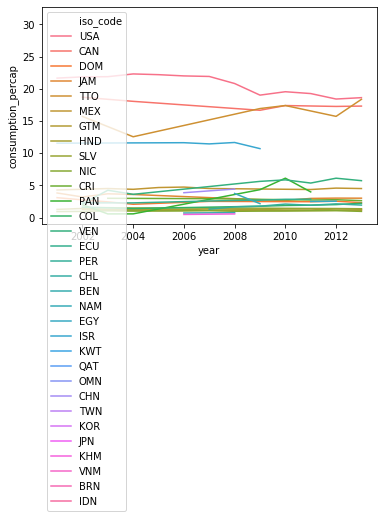

In [38]:
# Plot consumption percapita over time
sns.lineplot(x="year", y="consumption_percap",hue="iso_code", data=growth[growth['community']==1])

In [124]:
#compute variation rates of GDP, MgC_imports, and consumption_percap for each year
growth = growth[growth['year']>= 2000]
# compute lagged variables
growth['gdp_lag'] = growth.groupby(['iso_code_a'])['gdp'].shift(1)
growth['MgM_lag'] = growth.groupby(['iso_code_a'])['Mg_ImportsTot'].shift(1)
growth['consump_lag'] = growth.groupby(['iso_code_a'])['consumption_percap'].shift(1)
growth = growth.loc[growth['gdp_lag'].notnull()]

# compute variation rates 
growth['gdp_var']= (growth['gdp']- growth['gdp_lag'])/growth['gdp_lag']
growth['MgM_var']= (growth['Mg_ImportsTot']- growth['MgM_lag'])/growth['MgM_lag']
growth['consump_var']= (growth['consumption_percap']- growth['consump_lag'])/growth['consump_lag']


# Dataframe with growth rates  per country
#Take average growth rates per country
df_growth = growth[['iso_code_a','gdp_var','MgM_var','consump_var']].groupby(['iso_code_a']).agg({'gdp_var':'mean','MgM_var':'mean','consump_var':'mean'}).reset_index()

df_growth

/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,iso_code_a,gdp_var,MgM_var,consump_var
0,ALB,0.049885,0.074058,0.044282
1,ARE,0.058557,0.163558,-0.010991
2,ARG,0.035705,0.102923,0.026249
3,ARM,0.080221,0.103865,0.048360
4,AUS,0.031253,0.054881,0.010290
...,...,...,...,...
111,VEN,0.092775,0.076904,0.118306
112,VNM,0.078903,0.048749,0.100951
113,ZAF,0.039587,0.104843,0.012465
114,ZMB,0.120583,0.050405,0.028435


In [125]:
# Use growth dataframe to compute parameters for the model Consumption ~ B0+ B1*C_t-1 + B2*GDP + B3*Imports
# get list of countries
list_countries= growth['iso_code_a'].unique()

# Iterate over each country
dict_results={}
for country in list_countries.tolist():
    df_country= growth[growth['iso_code_a']== country]
    X= df_country[['consump_lag','gdp','imports_a']]
    Y= df_country['consumption_percap']
    result = sm.ols(formula="Y ~ X", data=df_country, missing='drop').fit()
    dict_results.setdefault('iso_code_a',[]).append(country)
    dict_results.setdefault('beta0',[]).append(result.params[0]) # Intercept
    dict_results.setdefault('beta1',[]).append(result.params[1]) # Consumption Lag to account for autocorrelation
    dict_results.setdefault('beta2',[]).append(result.params[2]) # Mg propensity GDP
    dict_results.setdefault('beta3',[]).append(result.params[3]) # Mg propensity Imports

    #dic_results.setdefault('resid',[]).append(np.mean(result.resid)) #Residuals

In [126]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     16.51
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           0.000530
Time:                        20:58:02   Log-Likelihood:                -185.03
No. Observations:                  13   AIC:                             378.1
Df Residuals:                       9   BIC:                             380.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.036e+06   4.36e+06      0.467      0.652   -7.83e+06    1.19e+07
X[0]           1.0001      0.438      2.284      0.048       0.010       1.991
X[1]          -2.2233      8.203     -0.271      0.792     -20.779      16.332
X[2]          11.0739    363.881      0.030      0.976    -812.083     834.230
==============================================================================
Omnibus:                        8.510   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.503
Skew:                          -1.314   Prob(JB):                        0.105
Kurtosis:                       4.187   Cond. No.                     5.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Convert dictionary with parameters to dataframe
df_params= pd.DataFrame.from_dict(dict_results)

## Merge computed parameters in the main dataframe
df= pd.merge(df, df_growth, on=['iso_code_a'], how='inner') #add annual variation rates
df= pd.merge(df, df_params, on=['iso_code_a'], how='inner') #add annual variation rates

In [128]:
df['GDP-X']= df['gdp']-df['exports_a']
df

,country_a,country_b,year,a_name,b_name,imports,exports,iso_code_a,iso_code_b,co2,...,Mg_ImportsTot,MgM_bilateral,gdp_var,MgM_var,consump_var,beta0,beta1,beta2,beta3,GDP-X
0,2,20,1997,United States of America,Canada,171440.00,145143.00,USA,CAN,5701.921,...,0.077689,1.503860,0.016730,0.037992,-0.012933,1.016693e+07,0.872685,-0.652415,1.074649,1.064842e+07
1,2,20,1998,United States of America,Canada,178048.00,149054.00,USA,CAN,5749.893,...,0.078416,1.496202,0.016730,0.037992,-0.012933,1.016693e+07,0.872685,-0.652415,1.074649,1.115523e+07
2,2,20,1999,United States of America,Canada,198828.00,157847.00,USA,CAN,5829.520,...,0.082637,1.590624,0.016730,0.037992,-0.012933,1.016693e+07,0.872685,-0.652415,1.074649,1.173701e+07
3,2,20,2000,United States of America,Canada,229191.00,169068.00,USA,CAN,5997.299,...,0.093547,1.763008,0.016730,0.037992,-0.012933,1.016693e+07,0.872685,-0.652415,1.074649,1.215974e+07
4,2,20,2001,United States of America,Canada,220138.00,155205.00,USA,CAN,5899.855,...,0.088473,1.680443,0.016730,0.037992,-0.012933,1.016693e+07,0.872685,-0.652415,1.074649,1.232560e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105920,900,920,2009,Australia,New Zealand,5765.09,4717.83,AUS,NZL,408.345,...,0.006219,0.621908,0.031253,0.054881,0.010290,2.036033e+06,1.000107,-2.223318,11.073881,9.222822e+05
105921,900,920,2010,Australia,New Zealand,7298.35,5568.84,AUS,NZL,406.426,...,0.007342,0.734240,0.031253,0.054881,0.010290,2.036033e+06,1.000107,-2.223318,11.073881,9.884312e+05
105922,900,920,2011,Australia,New Zealand,8619.08,5853.16,AUS,NZL,404.264,...,0.008368,0.836804,0.031253,0.054881,0.010290,2.036033e+06,1.000107,-2.223318,11.073881,1.024147e+06
105923,900,920,2012,Australia,New Zealand,8282.99,5837.67,AUS,NZL,406.987,...,0.008121,0.812058,0.031253,0.054881,0.010290,2.036033e+06,1.000107,-2.223318,11.073881,1.014162e+06


In [191]:
df2000= df[df['year']==2000]

## Dynamic Model

In [192]:
# Dataframe at the country level to define node attributes
nodes= df2000.drop_duplicates(subset=['country_a'], keep='first')
nodes= nodes.round(3)
df2000= df2000.round(3)

In [171]:
# Paris agreement priority groups
nodes['priority_group']= nodes['priority_group'].replace(np.nan, 0)

In [194]:
# Classify countries in four groups by GDP
nodes= nodes.sort_values(by=['gdp_percap'], ascending=False).reset_index(drop=True)
nodes['index1']=nodes.index
def classif(r):
    if r< 20:
        m= '1'
    elif r>=20 and r<60:
        m= '2'
    elif r>=60 and r<100:
        m= '3'
    elif r>= 100:
        m= '4'
    return m
nodes['group'] = nodes.index1.apply(classif)
nodes

,country_a,country_b,year,a_name,b_name,imports,exports,iso_code_a,iso_code_b,co2,...,gdp_var,MgM_var,consump_var,beta0,beta1,beta2,beta3,GDP-X,index1,group
0,696,698,2000,United Arab Emirates,Oman,3.100,1484.760,ARE,OMN,111.788,...,0.059,0.164,-0.011,1.211776e+07,0.162,55.981,-197.665,2.934563e+05,0,1
1,212,220,2000,Luxembourg,France,1395.220,2603.960,LUX,FRA,8.729,...,0.009,0.074,0.171,-3.997029e+07,0.020,1864.024,1607.181,2.166153e+04,1,1
2,694,696,2000,Qatar,United Arab Emirates,225.240,95.300,QAT,ARE,34.566,...,0.184,0.052,0.007,3.573346e+07,-0.046,-29.581,200.430,2.599430e+04,2,1
3,385,390,2000,Norway,Denmark,2195.910,3163.130,NOR,DNK,42.515,...,0.042,0.067,0.029,8.737675e+05,0.748,8.269,-65.693,2.381372e+05,3,1
4,2,20,2000,United States of America,Canada,229191.000,169068.000,USA,CAN,5997.299,...,0.017,0.038,-0.013,1.016693e+07,0.873,-0.652,1.075,1.215974e+07,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,461,471,2000,Togo,Cameroon,0.641,1.820,TGO,CMR,1.331,...,0.046,0.205,0.117,3.905919e+05,0.016,-6.797,756.748,5.780275e+03,111,4
112,771,780,2000,Bangladesh,Sri Lanka,8.270,3.560,BGD,LKA,26.525,...,0.071,0.057,0.065,1.209970e+05,0.189,0.689,1.760,1.847766e+05,112,4
113,439,452,2000,Burkina Faso,Ghana,6.560,2.940,BFA,GHA,1.031,...,0.040,0.184,0.053,2.291430e+04,0.285,5.330,-14.772,1.566227e+04,113,4
114,438,439,2000,Guinea,Burkina Faso,0.028,0.016,GIN,BFA,1.491,...,0.051,0.200,0.007,-8.195766e+04,1.447,1.775,-38.359,8.754316e+03,114,4


In [199]:
nodes['group'].value_counts()

3    40
2    40
1    20
4    16
Name: group, dtype: int64

In [161]:
df2000['consumption_percap']

13        1.954555e+07
30        1.954555e+07
47        1.954555e+07
64        1.954555e+07
81        1.954555e+07
              ...     
105853    1.100791e+06
105870    1.100791e+06
105887    1.794041e+06
105904    1.794041e+06
105921    1.730571e+07
Name: consumption_percap, Length: 6361, dtype: float64

In [195]:
def initialize():
    global G, nextg, pos
    # Create graph with edge attributes: Imports, parteners_consumption, and Imports growth rate= alpha
    G = nx.from_pandas_edgelist(df2000[['country_a','country_b','imports','exports','MgM_bilateral','MgM_var']], 'country_a', 'country_b', 
                                edge_attr=['imports','exports','MgM_bilateral','MgM_var'], create_using= nx.MultiDiGraph())
        # set graph layout
    pos = nx.spring_layout(G)
        # convert dataframe to dictionary of attributes
    node_attr = nodes[['country_a','exports_a','imports_a','GDP-X','gdp_var','consumption_percap','beta0','beta1','beta2','beta3','group']].set_index('country_a').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    # remove imbalanced node
    G.remove_node(920)
    
    nextg= G.copy()

In [134]:
initialize()
for i, data in nextg.nodes.data():
    print(nextg.nodes(data=True))

[(2, {'exports_a': 840259.75, 'imports_a': 1216111.5, 'GDP-X': 12159740.25, 'gdp_var': 0.02, 'consumption_percap': 22198983.43, 'beta0': 10166928.66, 'beta1': 0.87, 'beta2': -0.65, 'beta3': 1.07, 'group': '1'}), (20, {'exports_a': 51991.94, 'imports_a': 86325.0, 'GDP-X': 1098008.06, 'gdp_var': 0.02, 'consumption_percap': 18983947.95, 'beta0': 18071181.31, 'beta1': -0.52, 'beta2': 10.94, 'beta3': -36.26, 'group': '1'}), (42, {'exports_a': 299.73, 'imports_a': 3943.02, 'GDP-X': 63498.18, 'gdp_var': 0.05, 'consumption_percap': 3046157.48, 'beta0': 881172.59, 'beta1': 0.76, 'beta2': -11.68, 'beta3': 111.54, 'group': '3'}), (51, {'exports_a': 736.47, 'imports_a': 1355.26, 'GDP-X': 13243.55, 'gdp_var': 0.03, 'consumption_percap': 2992090.4, 'beta0': 4759557.3, 'beta1': 0.34, 'beta2': -188.25, 'beta3': 314.19, 'group': '4'}), (52, {'exports_a': 684.4, 'imports_a': 1177.43, 'GDP-X': 15183.45, 'gdp_var': 0.08, 'consumption_percap': 12387529.6, 'beta0': 5540804.76, 'beta1': 0.62, 'beta2': -142.4

In [183]:
for i, j, data in nextg.edges.data():
    print(nextg.edges(data=True))
    break

[(2, 20, {'imports': 229191.0, 'exports': 169068.0, 'MgM_bilateral': 1.763, 'MgM_var': 0.039}), (2, 42, {'imports': 4474.4, 'exports': 6321.83, 'MgM_bilateral': 0.034, 'MgM_var': 0.039}), (2, 51, {'imports': 669.2, 'exports': 1561.22, 'MgM_bilateral': 0.005, 'MgM_var': 0.039}), (2, 52, {'imports': 2353.3, 'exports': 807.69, 'MgM_bilateral': 0.018, 'MgM_var': 0.039}), (2, 70, {'imports': 135080.0, 'exports': 140288.0, 'MgM_bilateral': 1.039, 'MgM_var': 0.039}), (2, 90, {'imports': 2743.8, 'exports': 2076.43, 'MgM_bilateral': 0.021, 'MgM_var': 0.039}), (2, 91, {'imports': 3173.7, 'exports': 1356.46, 'MgM_bilateral': 0.024, 'MgM_var': 0.039}), (2, 92, {'imports': 1952.5, 'exports': 2475.8, 'MgM_bilateral': 0.015, 'MgM_var': 0.039}), (2, 93, {'imports': 597.3, 'exports': 450.94, 'MgM_bilateral': 0.005, 'MgM_var': 0.039}), (2, 94, {'imports': 3717.0, 'exports': 1509.39, 'MgM_bilateral': 0.029, 'MgM_var': 0.039}), (2, 95, {'imports': 345.7, 'exports': 1120.39, 'MgM_bilateral': 0.003, 'MgM_va

In [196]:
def update():
    global G, nextg

    # Update GDP with GDP growth rate
    for i in G.nodes():
        try:
            nextg.nodes[i]['GDP'] = (1+ G.nodes[i]['gdp_var'])* (G.nodes[i]['GDP-X'] + G.nodes[i]['exports_a'])
        except:
            continue
        
    # Update GDP without exports
    
    for i in G.nodes():
        try:
            nextg.nodes[i]['GDP-X'] = (1+ G.nodes[i]['gdp_var'])* G.nodes[i]['GDP-X']
        except:
            continue
    
    # Update Imports variation at edge level
    
    for i, j, k, weight in nextg.edges(data="weight", keys=True): 
        nextg[i][j][0]['imports']= (1 + nextg.edges[i,j,0]['MgM_var'])* (nextg.edges[i,j,0]['MgM_bilateral']/100)* nextg.nodes[i]['GDP']
    
    # Get total imports
    
    for i in nextg.nodes(): 
        nextg.nodes[i]['imports_a'] = nextg.out_degree(i,'imports')
    
    # Update bilateral exports based on updated bilateral imports:
    
    for i, j, k, weight in nextg.edges(data="weight", keys=True): 
        g= nextg[i][j][0]['imports']
        for j, y, z, w in nextg.edges(data="weight", keys=True):
            if y== i:
                nextg[j][y][0]['exports'] = g
            else:
                continue
     
    # Compute total exports
    for i in nextg.nodes(): 
        nextg.nodes[i]['exports_a'] = nextg.out_degree(i,'exports')
 
    
    # Compute consumption-based emissions at node level
    for i in nextg.nodes():
        try:
            nextg.nodes[i]['consumption_percap']= nextg.nodes[i]['beta0'] + nextg.nodes[i]['beta1']*G.nodes[i]['consumption_percap'] + nextg.nodes[i]['beta2']*nextg.nodes[i]['GDP'] + nextg.nodes[i]['beta3']*nextg.nodes[i]['imports_a']   
        except:
            nextg.nodes[i]['consumption_percap']=0
            
    G= nextg.copy()


In [197]:
def emissions_trend():
    global nextg
    high_income=0
    uppermiddle_income= 0
    lowermiddle_income= 0
    low_income= 0
    for i in nextg.nodes():
        if nextg.nodes[i]['group']=='1':
            high_income+= nextg.nodes[i]['consumption_percap']
        elif nextg.nodes[i]['group']=='2':
            uppermiddle_income+= nextg.nodes[i]['consumption_percap']
        elif nextg.nodes[i]['group']=='3':
            lowermiddle_income+= nextg.nodes[i]['consumption_percap']
        else:
            low_income+= nextg.nodes[i]['consumption_percap']
    return high_income, uppermiddle_income, lowermiddle_income, low_income

In [183]:
def priority_groups_trend():
    global nextg
    high_priority=0
    low_priority= 0

    for i in nextg.nodes():
        if nextg.nodes[i]['priority_group']==1.0 or nextg.nodes[i]['priority_group']== 2.0:
            high_priority+= nextg.nodes[i]['consumption_percap']
        elif nextg.nodes[i]['priority_group']==0:
            low_priority+= nextg.nodes[i]['consumption_percap']

    return high_priority, low_priority

### Simulations by income-level groups

In [198]:
N= 20
initialize()
emissions_high=[]
emissions_middleUpper=[]
emissions_middleLower=[]
emissions_low=[]

for i in range(N):
    update()
    H, U, M, L = emissions_trend() # Get consumption by groups at the end of period
    emissions_high.append(H) # array of total consumption for high income countries
    emissions_middleUpper.append(U) # array of total consumption for middle income countries
    emissions_middleLower.append(M)
    emissions_low.append(L) # array of total consumption for middle income countries
        
    

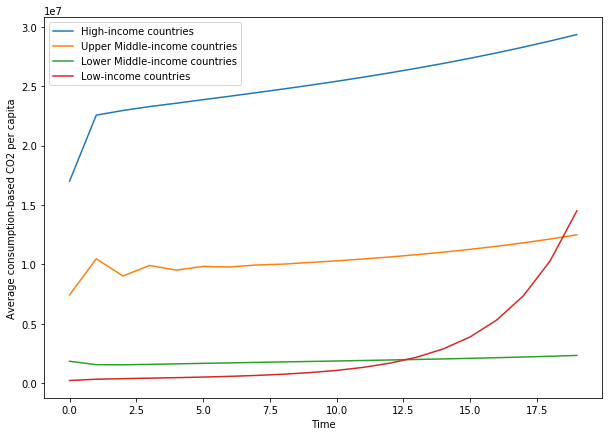

In [202]:
plt.figure(figsize=(10,7))
plt.plot(range(N),[x / 20 for x in emissions_high], label='High-income countries')
plt.plot(range(N),[x / 40 for x in emissions_middleUpper], label='Upper Middle-income countries')
plt.plot(range(N),[x / 40 for x in emissions_middleLower], label='Lower Middle-income countries')
plt.plot(range(N),[x / 16 for x in emissions_low], label='Low-income countries')

plt.xlabel('Time')
plt.ylabel('Average consumption-based CO2 per capita')
plt.legend()

### Simulations by group priority

In [186]:
N= 40
initialize()
emissions_highprio=[]
emissions_lowprio=[]


for i in range(N):
    update()
    X,Y = priority_groups_trend() # Get consumption by groups at the end of period
    emissions_highprio.append(X) # array of total consumption for high priority countries
    emissions_lowprio.append(Y) # array of total consumption for low countries
        
    

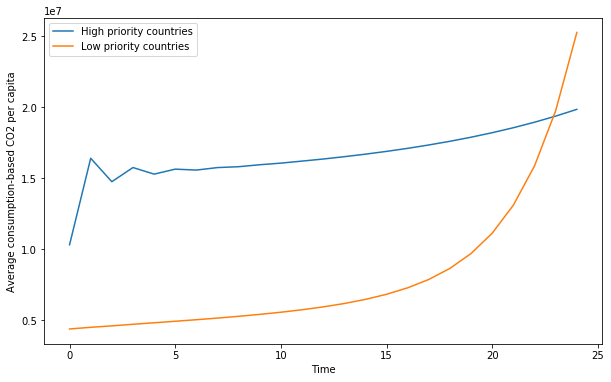

In [190]:
plt.figure(figsize=(10,6))
plt.plot(range(25),[x / 35 for x in emissions_highprio][0:25], label='High priority countries')
plt.plot(range(25),[x / 81 for x in emissions_lowprio][0:25], label='Low priority countries')

plt.xlabel('Time')
plt.ylabel('Average consumption-based CO2 per capita')
plt.legend()

In [ ]:
def networkBuild(a,b,imports,exports,year):
    print('makeing a trade graph for: ',year)
    a = list(a)
    b = list(b)
    imports = list(imports)
    exports = list(exports)
    
    g = nx.Graph()
    countries = set(a)
    
    for i in countries:
        g.add_node(i)
    
    for i in range(len(a)):
        g.add_edge(b[i],a[i], weight = imports[i])
        g.add_edge(a[i],b[i], weight = exports[i])
        
    return g

In [ ]:
def plotNetwork(g):
    ax, fig = plt.subplots()
    nx.draw(g, with_labels = True)
    plt.show()

def recordNetworkInfo(g):
    '''
    captures metrics on the network parameter: 
        degree distribution, 
        spectral gap
    '''
    info = dict()
    info['sg'] = sorted(nx.laplacian_spectrum(g))[1]
    return info